In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [14]:
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'

df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [17]:
model = RandomForestClassifier(random_state=42)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [18]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


c:\Users\p.zoffoli\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


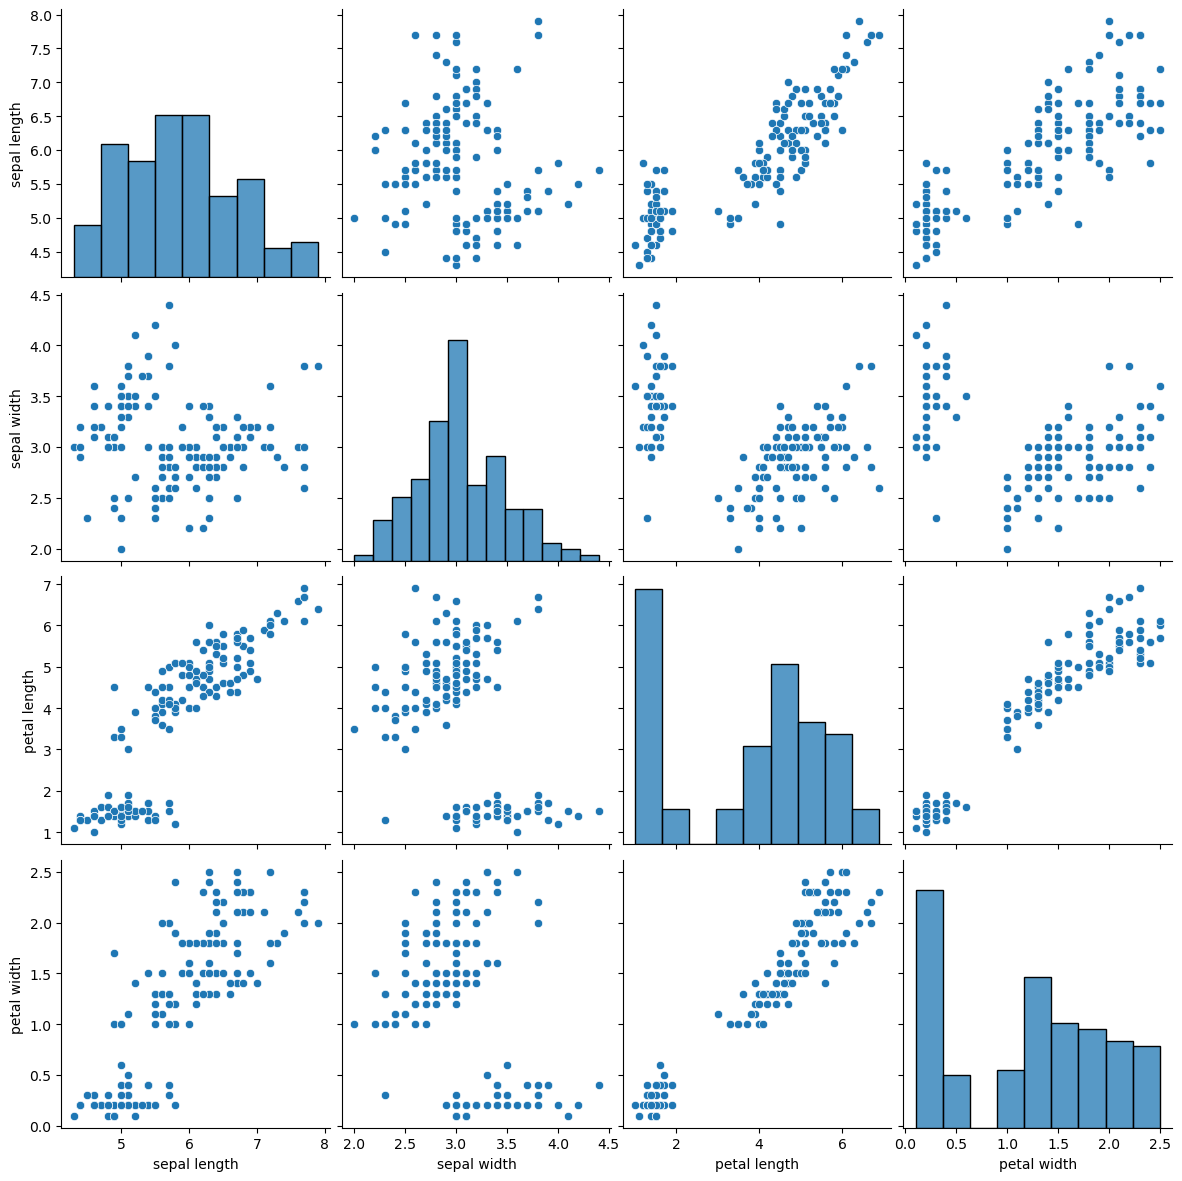

In [21]:
sns.pairplot(df, height=3, aspect=1)

c:\Users\p.zoffoli\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


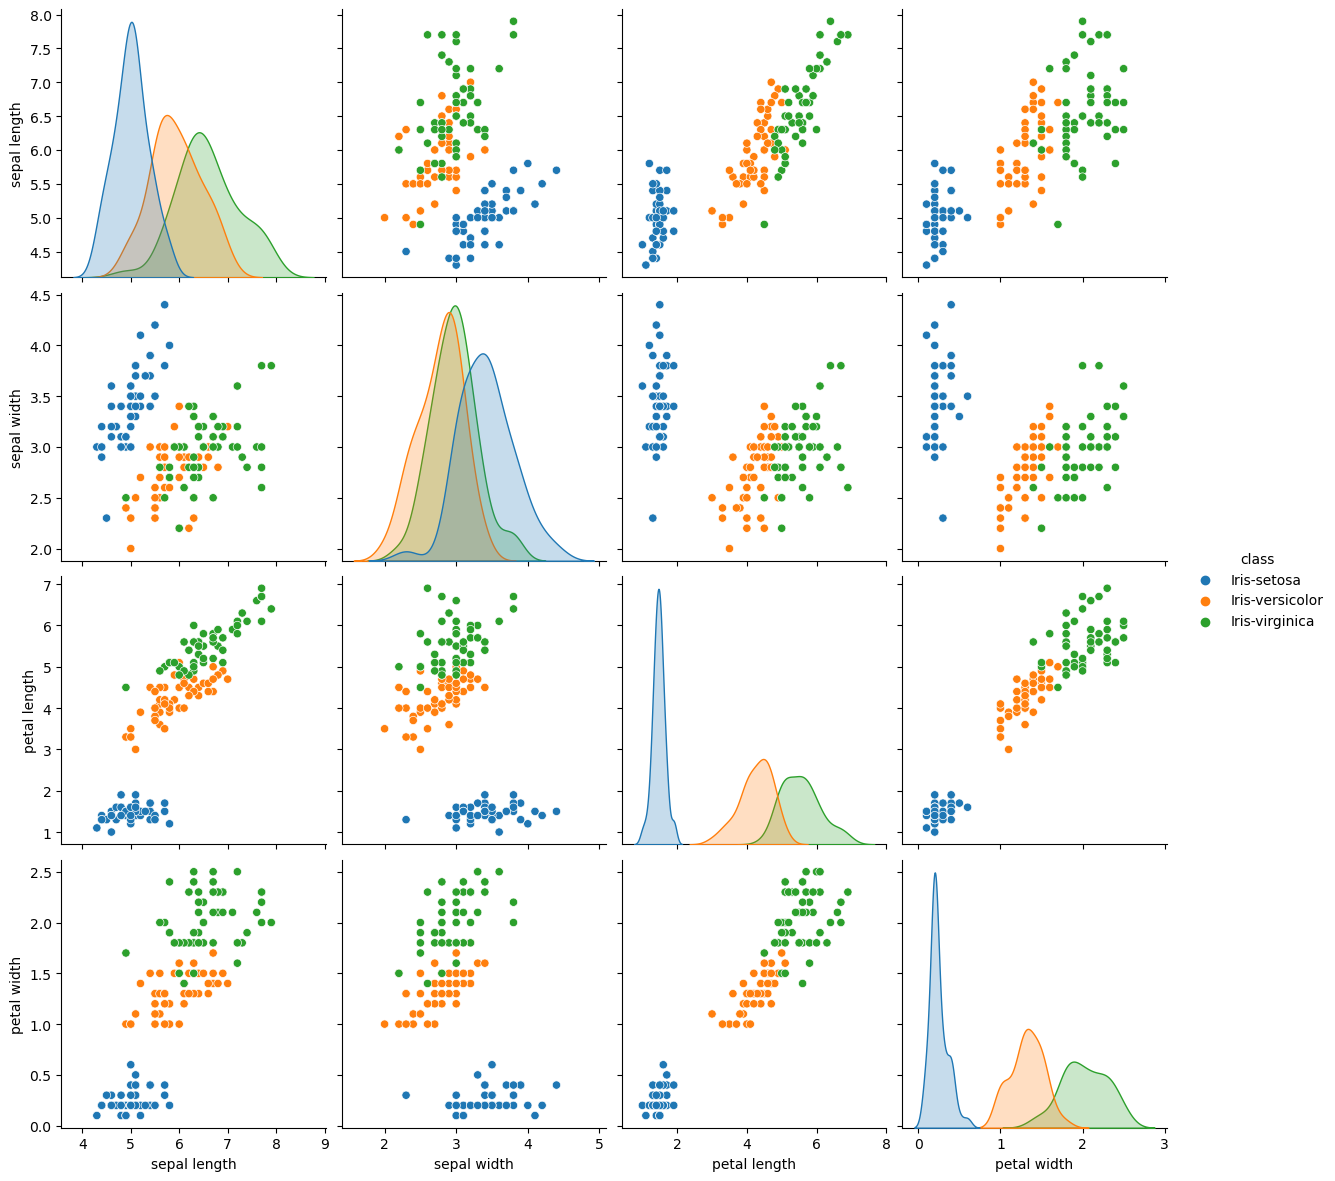

In [22]:
sns.pairplot(df, hue='class', height=3, aspect=1)

In [23]:
# store feature matrix in "x"
X = df.drop(['class'], axis=1)
# store response vector in "y"
y = df['class']

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )
print(y_test)

116     Iris-virginica
15         Iris-setosa
73     Iris-versicolor
80     Iris-versicolor
93     Iris-versicolor
51     Iris-versicolor
129     Iris-virginica
141     Iris-virginica
94     Iris-versicolor
123     Iris-virginica
12         Iris-setosa
106     Iris-virginica
69     Iris-versicolor
24         Iris-setosa
125     Iris-virginica
148     Iris-virginica
6          Iris-setosa
13         Iris-setosa
42         Iris-setosa
132     Iris-virginica
60     Iris-versicolor
68     Iris-versicolor
1          Iris-setosa
7          Iris-setosa
102     Iris-virginica
121     Iris-virginica
38         Iris-setosa
97     Iris-versicolor
98     Iris-versicolor
34         Iris-setosa
44         Iris-setosa
146     Iris-virginica
140     Iris-virginica
127     Iris-virginica
30         Iris-setosa
61     Iris-versicolor
48         Iris-setosa
103     Iris-virginica
21         Iris-setosa
31         Iris-setosa
114     Iris-virginica
53     Iris-versicolor
135     Iris-virginica
113     Iri

In [26]:
#Train the model with Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model

c:\Users\p.zoffoli\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
model.intercept_

array([ 10.19827304,   2.20775877, -12.4060318 ])

In [28]:
model.coef_

array([[-0.48312098,  0.70557899, -2.31590102, -0.92556101],
       [ 0.38515228, -0.22543964, -0.17345234, -0.68048825],
       [ 0.0979687 , -0.48013935,  2.48935335,  1.60604926]])

In [29]:
model.predict_proba(X_test)

array([[1.50737002e-04, 1.79933265e-01, 8.19915998e-01],
       [9.78671100e-01, 2.13288174e-02, 8.25147857e-08],
       [5.41637229e-03, 8.55873689e-01, 1.38709939e-01],
       [4.84872606e-02, 9.37043813e-01, 1.44689268e-02],
       [1.78213646e-01, 8.18641007e-01, 3.14534680e-03],
       [8.65225361e-03, 8.57158606e-01, 1.34189141e-01],
       [4.03463971e-05, 1.60142310e-01, 8.39817343e-01],
       [2.56308390e-04, 1.89273894e-01, 8.10469797e-01],
       [2.32776940e-02, 9.18222987e-01, 5.84993186e-02],
       [1.32519271e-03, 4.86163179e-01, 5.12511628e-01],
       [9.73193025e-01, 2.68069009e-02, 7.40233627e-08],
       [1.25060573e-02, 6.78805046e-01, 3.08688897e-01],
       [3.96080718e-02, 9.42402257e-01, 1.79896714e-02],
       [9.46271557e-01, 5.37278053e-02, 6.37675016e-07],
       [1.30646794e-05, 6.93921454e-02, 9.30594790e-01],
       [1.46728366e-04, 8.48626901e-02, 9.14990582e-01],
       [9.83519611e-01, 1.64803199e-02, 6.87689731e-08],
       [9.90703643e-01, 9.29634

In [31]:
#Test the model
y_pred  = model.predict(X_test)
print(y_pred )# printing predictions

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']


In [32]:
confronto = pd.DataFrame(data = [y_pred,y_test])
confronto = confronto.T
confronto.columns = ['predetti', 'reali_test']
confronto

,predetti,reali_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


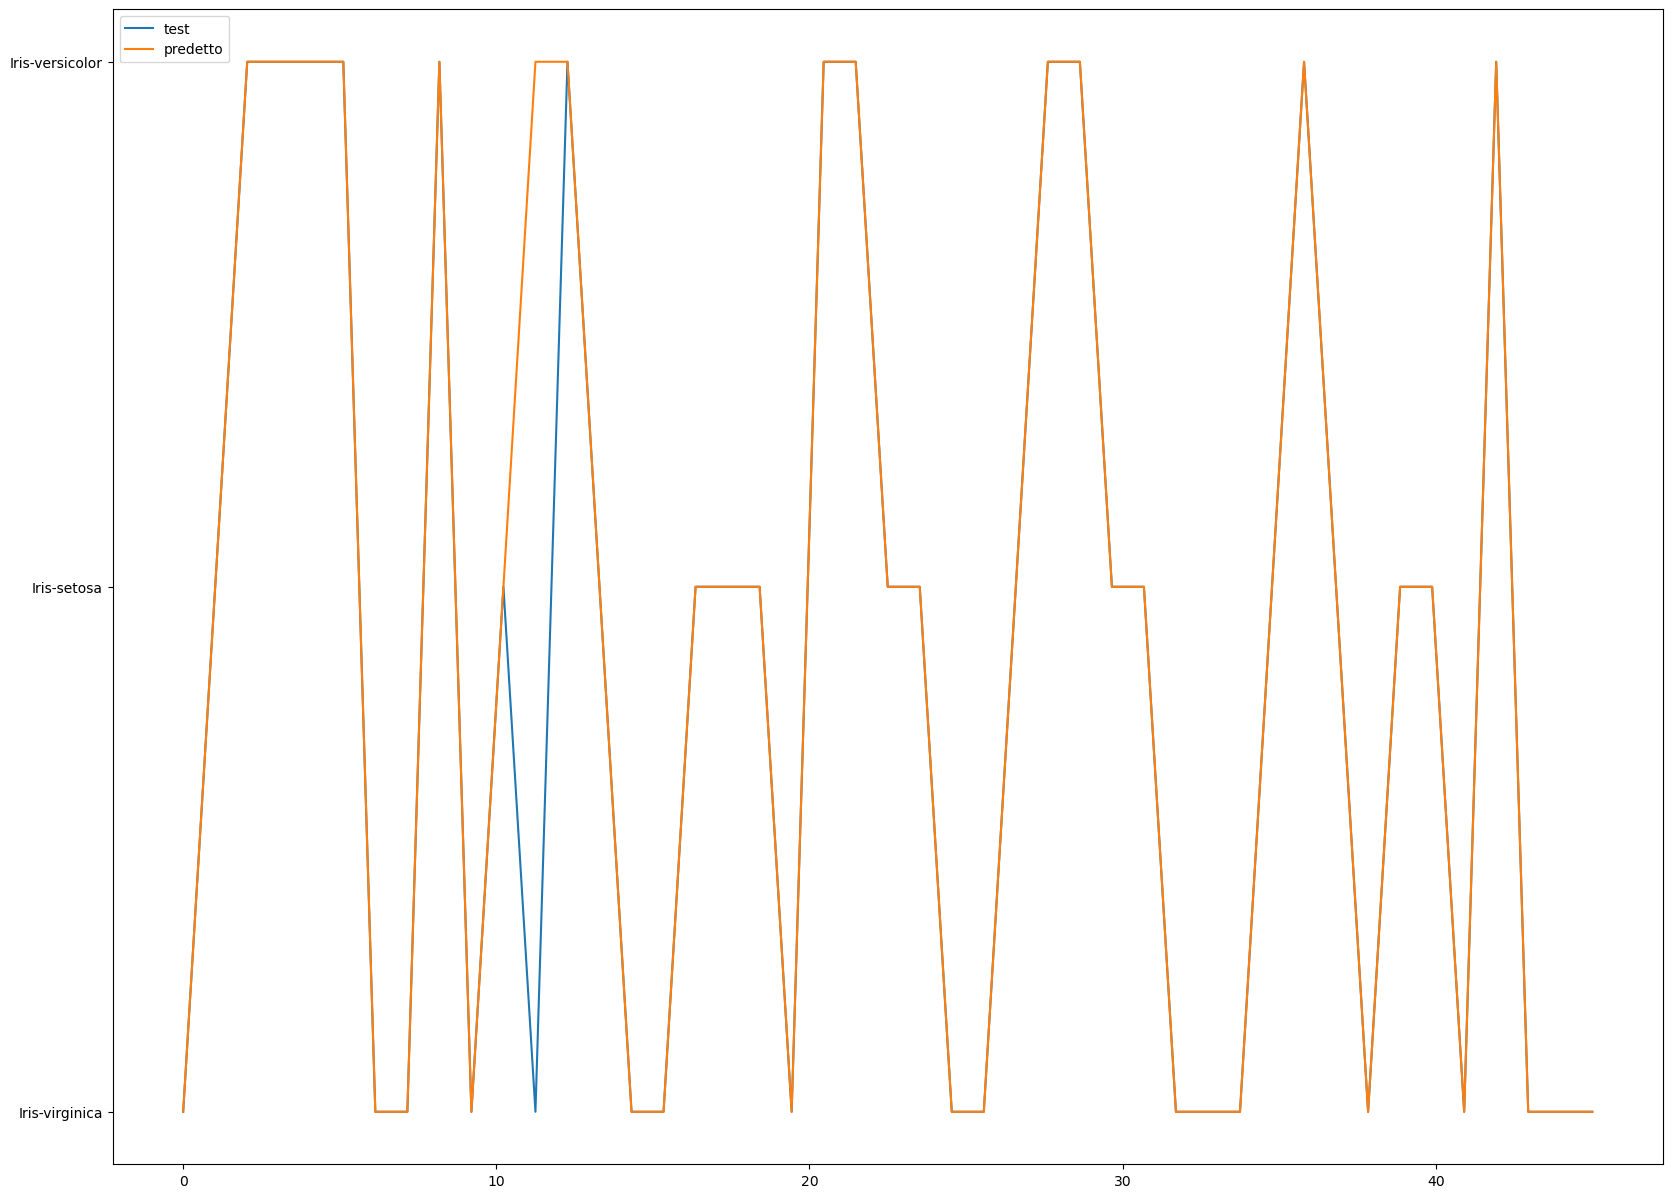

In [33]:
import numpy as np
length = y_pred.shape[0] # 30 
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2)

In [34]:
acc = accuracy_score(y_test,y_pred)
print(f"L'accuracy totale è: {round(acc,2)*100}%")

L'accuracy totale è: 98.0%


In [35]:
joblib.dump(model, "iris_model.pkl")

['iris_model.pkl']